In [ ]:
#Develop a predictive model to estimate month-wise average temperature of India using Linear Regression.
# The data contains average monthly temperatures (°C) across various Indian locations.
# Dataset: Temperatures Tasks:
# 1. Apply Linear Regression using suitable library functions.
# 2. Predict temperature trends month-wise.
# 3. Assess model performance using:
# o Mean Squared Error (MSE) o Mean Absolute Error (MAE) o R-Square (R²) metric
# 4. Visualize the simple regression model using plots.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/temperatures - temperatures.csv")

In [4]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [6]:
df.shape

(117, 18)

In [8]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [7]:
df.isnull().sum()

,0
YEAR,0
JAN,0
FEB,0
MAR,0
APR,0
MAY,0
JUN,0
JUL,0
AUG,0
SEP,0


In [21]:
df.melt?



In [24]:
months = df.iloc[:, 0:13].columns.tolist
print(months)

<bound method IndexOpsMixin.tolist of Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'],
      dtype='object')>


In [26]:
df_months = df.iloc[:, 0:13]

In [28]:
df_months.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82


In [29]:
df_long = df_months.melt(id_vars='YEAR', var_name='MONTH', value_name='TEMPERATURE')

In [30]:
df_long.head()

,YEAR,MONTH,TEMPERATURE
0,1901,JAN,22.40
1,1902,JAN,24.93
2,1903,JAN,23.44
3,1904,JAN,22.50
4,1905,JAN,22.00


In [32]:
df_long['MONTH'].unique()

array(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'], dtype=object)

In [33]:
df_long.isnull().sum()

,0
YEAR,0
MONTH,0
TEMPERATURE,0


In [34]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         1404 non-null   int64  
 1   MONTH        1404 non-null   object 
 2   TEMPERATURE  1404 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.0+ KB


In [35]:
months = df.iloc[:, 1:13].columns.tolist()

In [37]:
month_map={}
for i in range(len(months)):
  month_map[months[i]] = i+1

In [38]:
print(month_map)

{'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}


In [40]:
#create new column
df_long['Month_num'] = df_long['MONTH'].map(month_map)

In [41]:
df_long.head()

,YEAR,MONTH,TEMPERATURE,Month_num
0,1901,JAN,22.40,1
1,1902,JAN,24.93,1
2,1903,JAN,23.44,1
3,1904,JAN,22.50,1
4,1905,JAN,22.00,1


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
X = df_long[['YEAR', 'Month_num']]
y = df_long['TEMPERATURE']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [51]:
y_pred = lr.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"Mean Absolute Error (MAE):",mae)
print(f"R-Square (R²):",r2)

Mean Squared Error (MSE): 9.926688931474676
Mean Absolute Error (MAE): 2.642333359769452
R-Square (R²): 0.016934942934127672


In [58]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [67]:
y_pred_dt = dt.predict(X_test)

In [68]:
mse = mean_squared_error(y_test, y_pred_dt)
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error (MSE):",mse)
print(f"Mean Absolute Error (MAE):",mae)
print(f"R-Square (R²):",r2)

Mean Squared Error (MSE): 0.6510039145907472
Mean Absolute Error (MAE): 0.6213879003558719
R-Square (R²): 0.9355294393865744


In [72]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

Train R²: 1.0
Test R²: 0.9355294393865744


# Visualize the simple regression model using plots.

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='TEMPERATURE'>

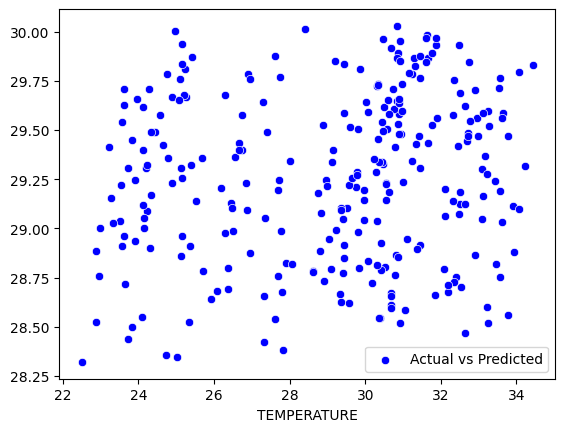

In [76]:
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Actual vs Predicted")

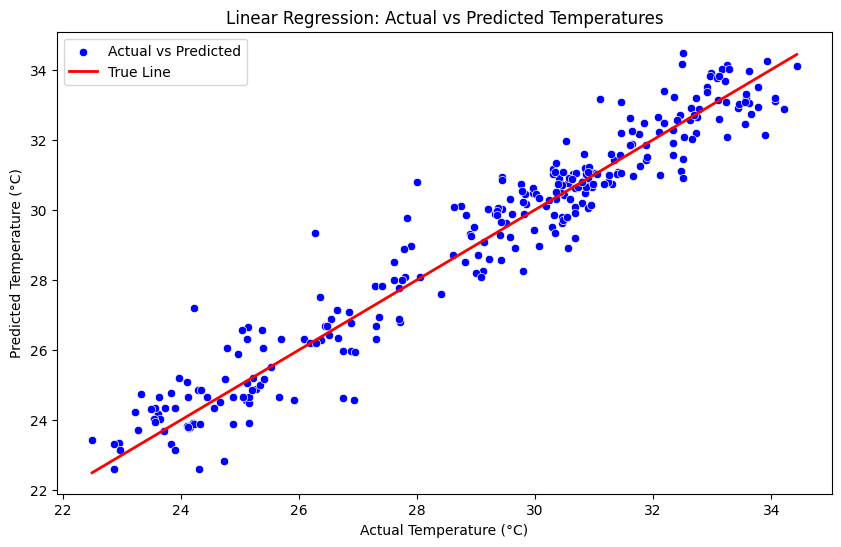

In [81]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_dt, color="blue", label="Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="True Line")
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Linear Regression: Actual vs Predicted Temperatures')
plt.legend()
plt.show()

In [84]:
#help(sns.scatterplot)

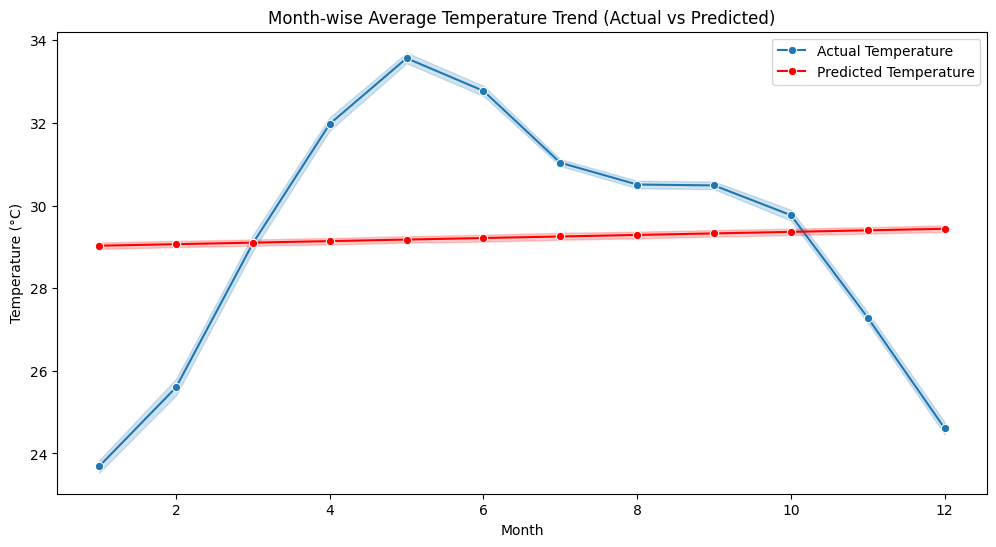

In [83]:
df_long['Predicted_Temp'] = lr.predict(df_long[['YEAR', 'Month_num']])

plt.figure(figsize=(12,6))
sns.lineplot(data=df_long, x='Month_num', y='TEMPERATURE', label='Actual Temperature', marker='o')
sns.lineplot(data=df_long, x='Month_num', y='Predicted_Temp', label='Predicted Temperature', marker='o', color='red')
plt.title('Month-wise Average Temperature Trend (Actual vs Predicted)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()